# A1 - Predicting Car Prices

Regression problem.

1. Load data 
    a. Load data from CSV file and inspect file format and content in high level 
    b. Cleanup and encoding
2. Exploratory Data Analysis
    a. Check class imbalance
    b. Distribution plot
3. Feature engineering
    a. Dimensionality reduction
    b. feature splitting
    c. creating features
4. Feature selection
    a. select x features
    b. select y target
5. Preprocessing
    a. Null values
    b. Outliers
    c. Fix class imbalance
    d. Typos/Entry errors/Duplicates/IDs
6. Model selection
    a. Regresssion
7. Testing 
    a. Regression (r2, MSE)
8. Analysis
    a. Analyse model - feature importance
9. Inference
    a. Apply your best model on soem unseen data and see whether it makes sense
10. Deployment
    a. Docker / Plotly


## 0. Import Libs

In [315]:
# core data handling libraries
## dataframes for structured data
import pandas as pd
## numerical computing, arrays, linear algebra
import numpy as np

## Statistical data visualization (built on Matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')



## 1. Load Data

In [316]:
df = pd.read_csv("../data/Cars.csv")
len(df)

8128

In [317]:
type(df)

pandas.core.frame.DataFrame

In [318]:
df.shape

(8128, 13)

In [319]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [320]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [321]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

• For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [322]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [323]:
owner_encoding = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

In [324]:
df['owner_num'] = df['owner'].replace(owner_encoding)
df[['owner', 'owner_num']].head(10)

,owner,owner_num
0,First Owner,1
1,Second Owner,2
2,Third Owner,3
3,First Owner,1
4,First Owner,1
5,First Owner,1
6,First Owner,1
7,Second Owner,2
8,First Owner,1
9,First Owner,1


• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [325]:
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [326]:
# count() = total rows
# sum() = matching rows (CNG or LPG)
(df['fuel'].isin(['CNG', 'LPG'])).sum()

np.int64(95)

In [327]:
#Expected new count : 8128 - 95 = 8033 
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
print(df['fuel'].count())

8033


• For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [328]:
# Remove 'kmpl' and convert mileage to float
df['mileage_num'] = df['mileage'].str.split().str[0].astype(float)
df[['mileage', 'mileage_num']].head()

,mileage,mileage_num
0,23.4 kmpl,23.40
1,21.14 kmpl,21.14
2,17.7 kmpl,17.70
3,23.0 kmpl,23.00
4,16.1 kmpl,16.10


• For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [329]:
df['engine_num'] = df['engine'].str.split().str[0].astype(float)
df[['engine_num', 'engine']].head()

,engine_num,engine
0,1248.0,1248 CC
1,1498.0,1498 CC
2,1497.0,1497 CC
3,1396.0,1396 CC
4,1298.0,1298 CC


• Do the same for max power

In [330]:
df['max_power_num'] = df['max_power'].str.split().str[0].astype(float)
df[['max_power_num', 'max_power']].head()

,max_power_num,max_power
0,74.00,74 bhp
1,103.52,103.52 bhp
2,78.00,78 bhp
3,90.00,90 bhp
4,88.20,88.2 bhp


• For the feature brand, take only the first word and remove the rest

In [331]:
df['brand'] = df['name'].str.split().str[0]
df[['name', 'brand']].head()

,name,brand
0,Maruti Swift Dzire VDI,Maruti
1,Skoda Rapid 1.5 TDI Ambition,Skoda
2,Honda City 2017-2020 EXi,Honda
3,Hyundai i20 Sportz Diesel,Hyundai
4,Maruti Swift VXI BSIII,Maruti


• Drop the feature torque, simply because Chaky’s company does not understand well about it
• You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [332]:
(df['owner_num'] == owner_encoding['Test Drive Car']).sum()

np.int64(5)

In [333]:
# expected new count : 8033 - 5 = 8028
df = df[df['owner_num'] != owner_encoding['Test Drive Car']]
print(df['owner_num'].count())

8028


## 2. Exploratory Data Analysis

In [334]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(f"eg.: {df[col].unique()[:5]}")


name: 2015 unique values
eg.: ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' 'Hyundai i20 Sportz Diesel'
 'Maruti Swift VXI BSIII']

fuel: 2 unique values
eg.: ['Diesel' 'Petrol']

seller_type: 3 unique values
eg.: ['Individual' 'Dealer' 'Trustmark Dealer']

transmission: 2 unique values
eg.: ['Manual' 'Automatic']

owner: 4 unique values
eg.: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']

mileage: 366 unique values
eg.: ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl']

engine: 121 unique values
eg.: ['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC']

max_power: 308 unique values
eg.: ['74 bhp' '103.52 bhp' '78 bhp' '90 bhp' '88.2 bhp']

torque: 425 unique values
eg.: ['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '12.7@ 2,700(kgm@ rpm)'
 '22.4 kgm at 1750-2750rpm' '11.5@ 4,500(kgm@ rpm)']

brand: 32 unique values
eg.: ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota']


In [335]:
# Distribution of target variable 'Price
# display plots in notebook
%matplotlib inline

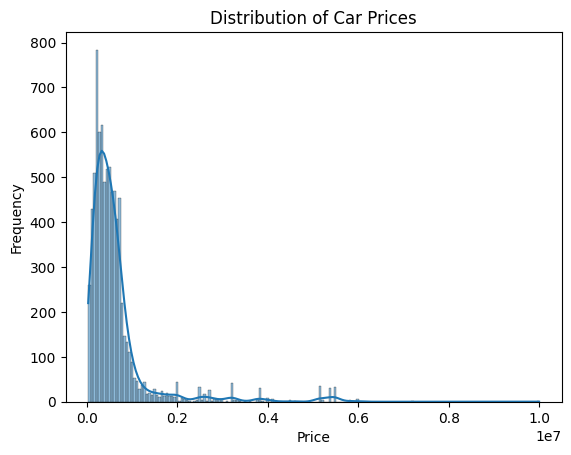

In [336]:
sns.histplot(df.selling_price, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='selling_price', ylabel='Count'>

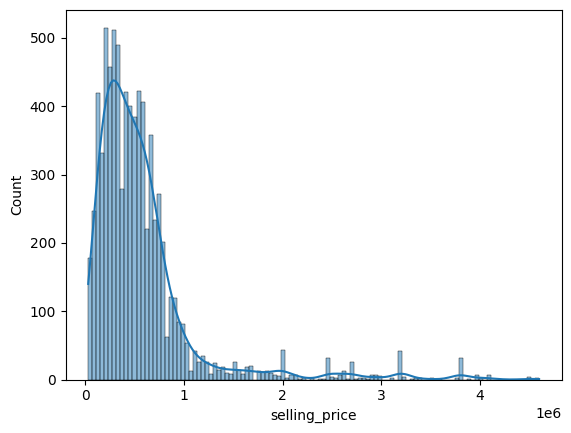

In [337]:
# Long tail distribution needs to be handled
sns.histplot(df.selling_price[df.selling_price < 5000000], kde=True)

In [338]:
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

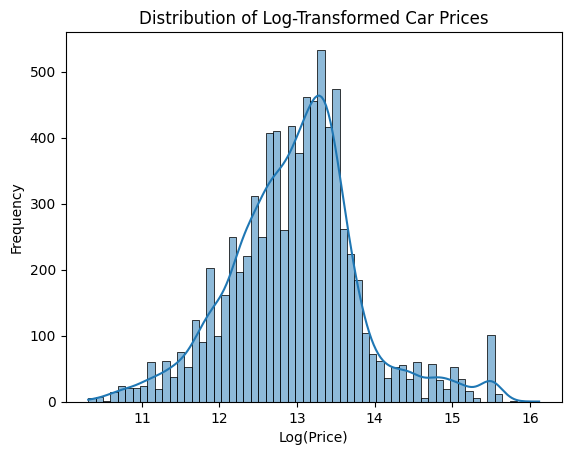

In [339]:
# Apply log transformation to reduce long tail effect
price_log = np.log1p(df.selling_price)
sns.histplot(price_log, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

# 4. Feature Selection & Preprocessing

In [340]:
df['log_price'] = np.log1p(df.selling_price)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_num,mileage_num,engine_num,max_power_num,brand,log_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,23.40,1248.0,74.00,Maruti,13.017005
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,21.14,1498.0,103.52,Skoda,12.821261
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,17.70,1497.0,78.00,Honda,11.970357
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,23.00,1396.0,90.00,Hyundai,12.323860
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,16.10,1298.0,88.20,Maruti,11.775297


In [341]:
# Missing values 
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
torque           214
seats            214
owner_num          0
mileage_num      214
engine_num       214
max_power_num    208
brand              0
log_price          0
dtype: int64

In [342]:
# Missing value percentage 
214/len(df)

0.02665670154459392

In [343]:
# Dropping rows with null mileage
df = df.dropna(subset=['mileage'])
df = df.dropna(subset=['engine'])
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
owner_num        0
mileage_num      0
engine_num       0
max_power_num    0
brand            0
log_price        0
dtype: int64


In [344]:
# Setting up the validation framework
n = len(df)
n_val = int(0.2 * n)  # 20% for validation
n_test = int(0.2 * n)  # 20% for test
n_train = n - n_val - n_test  # remaining 60% for training


In [345]:
n, n_val + n_test + n_train

(7814, 7814)

In [346]:
n_val, n_test, n_train 

(1562, 1562, 4690)

In [347]:
df.iloc[:n_train].shape, df.iloc[n_train:n_train+n_val].shape, df.iloc[n_train+n_val:].shape

((4690, 19), (1562, 19), (1562, 19))

In [348]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [349]:
df_val

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_num,mileage_num,engine_num,max_power_num,brand,log_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,23.40,1248.0,74.00,Maruti,13.017005
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,21.14,1498.0,103.52,Skoda,12.821261
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,17.70,1497.0,78.00,Honda,11.970357
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,23.00,1396.0,90.00,Hyundai,12.323860
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,16.10,1298.0,88.20,Maruti,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,Tata Indica Vista TDI LS,2013,160000,110000,Diesel,Individual,Manual,First Owner,19.4 kmpl,1405 CC,70 bhp,135.4Nm@ 2500rpm,5.0,1,19.40,1405.0,70.00,Tata,11.982935
1617,Hyundai EON Era Plus,2015,250000,80000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0,1,21.10,814.0,55.20,Hyundai,12.429220
1618,Maruti Ertiga ZDI,2013,385000,100000,Diesel,Individual,Manual,Third Owner,20.77 kmpl,1248 CC,88.8 bhp,200Nm@ 1750rpm,7.0,3,20.77,1248.0,88.80,Maruti,12.861001
1619,Maruti Wagon R VXI BS IV with ABS,2014,318000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.06 bhp,90Nm@ 3500rpm,5.0,1,20.51,998.0,67.06,Maruti,12.669810


In [350]:
idx = np.arange(len(df))
# make random numbers reproducible
np.random.seed(2)
np.random.shuffle(idx)
df.iloc[idx]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_num,mileage_num,engine_num,max_power_num,brand,log_price
5599,Volkswagen Polo 1.5 TDI Highline,2015,550000,90000,Diesel,Individual,Manual,First Owner,20.14 kmpl,1498 CC,88.8 bhp,230Nm@ 1500-2500rpm,5.0,1,20.14,1498.0,88.80,Volkswagen,13.217675
5790,Mahindra Scorpio SLE BSIII,2013,550000,80000,Diesel,Individual,Manual,Second Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,8.0,2,12.05,2179.0,120.00,Mahindra,13.217675
1187,Chevrolet Spark 1.0 E,2009,90000,50000,Petrol,Individual,Manual,Second Owner,16.0 kmpl,995 CC,63 bhp,"9.2@ 4,200(kgm@ rpm)",5.0,2,16.00,995.0,63.00,Chevrolet,11.407576
6831,Honda Civic 1.8 V MT Inspire,2011,350000,50000,Petrol,Individual,Manual,First Owner,15.5 kmpl,1799 CC,132 bhp,"17.5@ 4,300(kgm@ rpm)",5.0,1,15.50,1799.0,132.00,Honda,12.765691
4609,Honda City i-VTEC VX,2017,950000,35000,Petrol,Individual,Manual,First Owner,17.4 kmpl,1497 CC,117.6 bhp,145Nm@ 4600rpm,5.0,1,17.40,1497.0,117.60,Honda,13.764218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,Maruti Swift VDI,2014,490000,67000,Diesel,Dealer,Manual,First Owner,28.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,28.40,1248.0,74.00,Maruti,13.102163
5947,Honda Amaze E Diesel BSIV,2014,465000,27233,Diesel,Dealer,Manual,First Owner,27.4 kmpl,1498 CC,98.63 bhp,200Nm@ 1750rpm,5.0,1,27.40,1498.0,98.63,Honda,13.049795
6907,Hyundai Verna 1.6 SX CRDi (O),2012,500000,70000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0,1,22.32,1582.0,126.32,Hyundai,13.122365
2689,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,23.40,1248.0,74.00,Maruti,13.102163


In [351]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [352]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_num,mileage_num,engine_num,max_power_num,brand,log_price
5599,Volkswagen Polo 1.5 TDI Highline,2015,550000,90000,Diesel,Individual,Manual,First Owner,20.14 kmpl,1498 CC,88.8 bhp,230Nm@ 1500-2500rpm,5.0,1,20.14,1498.0,88.80,Volkswagen,13.217675
5790,Mahindra Scorpio SLE BSIII,2013,550000,80000,Diesel,Individual,Manual,Second Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,8.0,2,12.05,2179.0,120.00,Mahindra,13.217675
1187,Chevrolet Spark 1.0 E,2009,90000,50000,Petrol,Individual,Manual,Second Owner,16.0 kmpl,995 CC,63 bhp,"9.2@ 4,200(kgm@ rpm)",5.0,2,16.00,995.0,63.00,Chevrolet,11.407576
6831,Honda Civic 1.8 V MT Inspire,2011,350000,50000,Petrol,Individual,Manual,First Owner,15.5 kmpl,1799 CC,132 bhp,"17.5@ 4,300(kgm@ rpm)",5.0,1,15.50,1799.0,132.00,Honda,12.765691
4609,Honda City i-VTEC VX,2017,950000,35000,Petrol,Individual,Manual,First Owner,17.4 kmpl,1497 CC,117.6 bhp,145Nm@ 4600rpm,5.0,1,17.40,1497.0,117.60,Honda,13.764218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,Honda CR-V 2.4L 4WD MT,2008,400000,120000,Petrol,Individual,Manual,First Owner,11.1 kmpl,2354 CC,158.8 bhp,218Nm@ 4200rpm,5.0,1,11.10,2354.0,158.80,Honda,12.899222
5200,Toyota Innova 2.5 VX (Diesel) 8 Seater,2016,1200000,90000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,8.0,1,12.99,2494.0,100.60,Toyota,13.997833
2988,Hyundai EON Magna Plus,2012,180000,56000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0,1,21.10,814.0,55.20,Hyundai,12.100718
6167,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0,1,22.37,2487.0,214.56,Lexus,15.454507


In [353]:
len(df_train), len(df_val), len(df_test) , len(df_train)+ len(df_val)+ len(df_test) 

(4690, 1562, 1562, 7814)

In [354]:
selected_columns = ['brand', 'year', 'log_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner_num', 'mileage_num', 'engine_num', 'max_power_num', 'seats']
df = df[selected_columns].rename(columns={
    'log_price': 'selling_price',
    'owner_num': 'owner',
    'mileage_num': 'mileage',
    'engine_num': 'engine',
    'max_power_num': 'max_power'
})
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017005,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821261,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970357,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323860,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775297,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [355]:
df.shape

(7814, 12)

In [356]:
y_train = np.log1p(df_train.selling_price.values)
y_val = np.log1p(df_val.selling_price.values)
y_test = np.log1p(df_test.selling_price.values)

# Remove target from dataframes
del df_train['selling_price']
del df_val['selling_price']
del df_test['selling_price']

# 6. Model Selection - Linear Regresssion
 During inference/testing, you have to transform your predicted y backed before comparing with y
test, i.e.,

In [357]:
df_train.iloc[10]

name             Maruti SX4 Vxi BSIII
year                             2007
km_driven                      120000
fuel                           Petrol
seller_type                Individual
transmission                   Manual
owner                    Second Owner
mileage                     15.0 kmpl
engine                        1586 CC
max_power                  104.68 bhp
torque           145@ 4,100(kgm@ rpm)
seats                             5.0
owner_num                           2
mileage_num                      15.0
engine_num                     1586.0
max_power_num                  104.68
brand                          Maruti
log_price                   11.982935
Name: 1211, dtype: object

Features selected : ['km_driven', 'mileage', 'engine']

# 7. Testing

In [358]:
xi = [120000, 15.0, 1586.0]

In [359]:
def linear_regression(xi, w0, w):
    pred = w0
    for i in range(len(xi)):
        pred += w[i] * float(xi[i])
    return pred

In [364]:
linear_regression(xi, w0, w)

121601.0

In [363]:
np.expm1(linear_regression(xi, w0, w))

np.float64(inf)